In [1]:
#loading in all the essentials for data manipulation
import pandas as pd
import numpy as np

#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams

# Use counter to count the objects 
from collections import Counter

# This is the visual library
import seaborn as sns
import matplotlib.pyplot as plt

# Regex library
import re

In [2]:
#loading in real data
data = pd.read_csv(r'logs_ejercicios.csv')
#selecting interesting columns
df = pd.DataFrame(data, columns=['nMensajes', 'Conversación'])

#print(df)


In [3]:
# selecting messages with user interaction (nMensajes !=0)
text_data =[]
for i in range(len(df)):
    if(df.loc[i,"nMensajes"] !=0):
        text_data.append(df.loc[i,'Conversación'])
 
#print(len(text_data))
#text_data_df=pd.DataFrame(text_data)
#text_data_df.to_csv('chat.csv')

# Converting to text to split in sentences looking for "\d+" index (steps of the conversation)
text=''.join(text_data)
text_split=re.split('"\d+\"',text)

#text_data_df=pd.DataFrame(text_split)
#text_data_df.to_csv('chat.csv')

# Extracting only messages with "mensajeUsuario" content and clean the rest of the sentence
text_data_user=[]
for i in range(len(text_split)):
    if("mensajeUsuario" in text_split[i]):
        text_data_user.append(text_split[i].rsplit(':',1)[1][:-3].lower().replace('pista','').replace('ayuda',''))
        
#for i in range(len(text_data_user)):
#    print(text_data_user[i])
    

In [4]:
#function 
def word_frequency(sentence):
    
    # joins all the sentenses
    sentence =''.join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    
    # CHANGE TO english???
    new_tokens =[t for t in new_tokens if t not in stopwords.words('spanish')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
       
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    
    
    return counted, word_freq,word_pairs,trigrams


<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

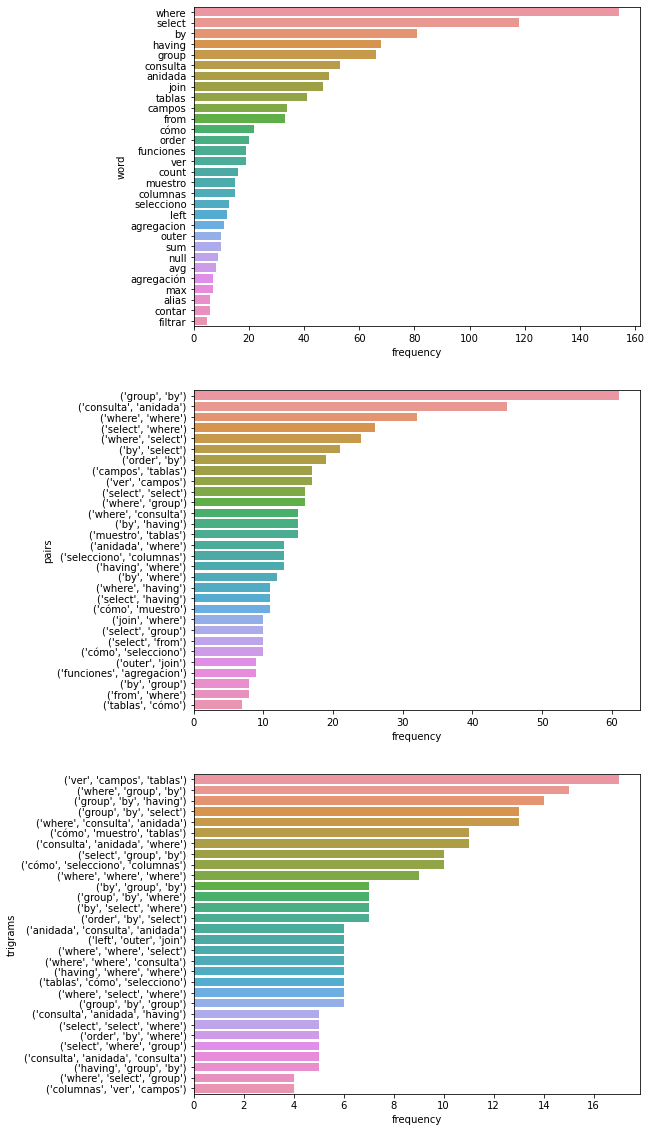

In [5]:
dictionary, data2, data3, data4 = word_frequency(text_data_user)

# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))


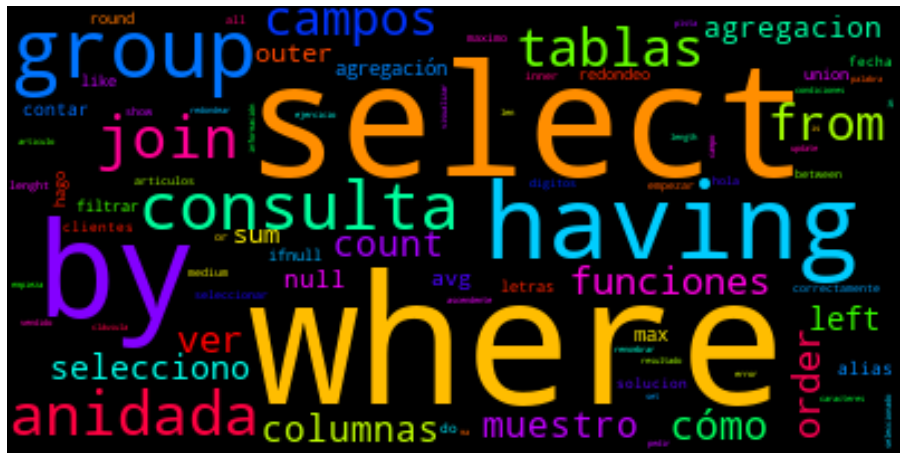

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 521.5, 693.5, -0.5)

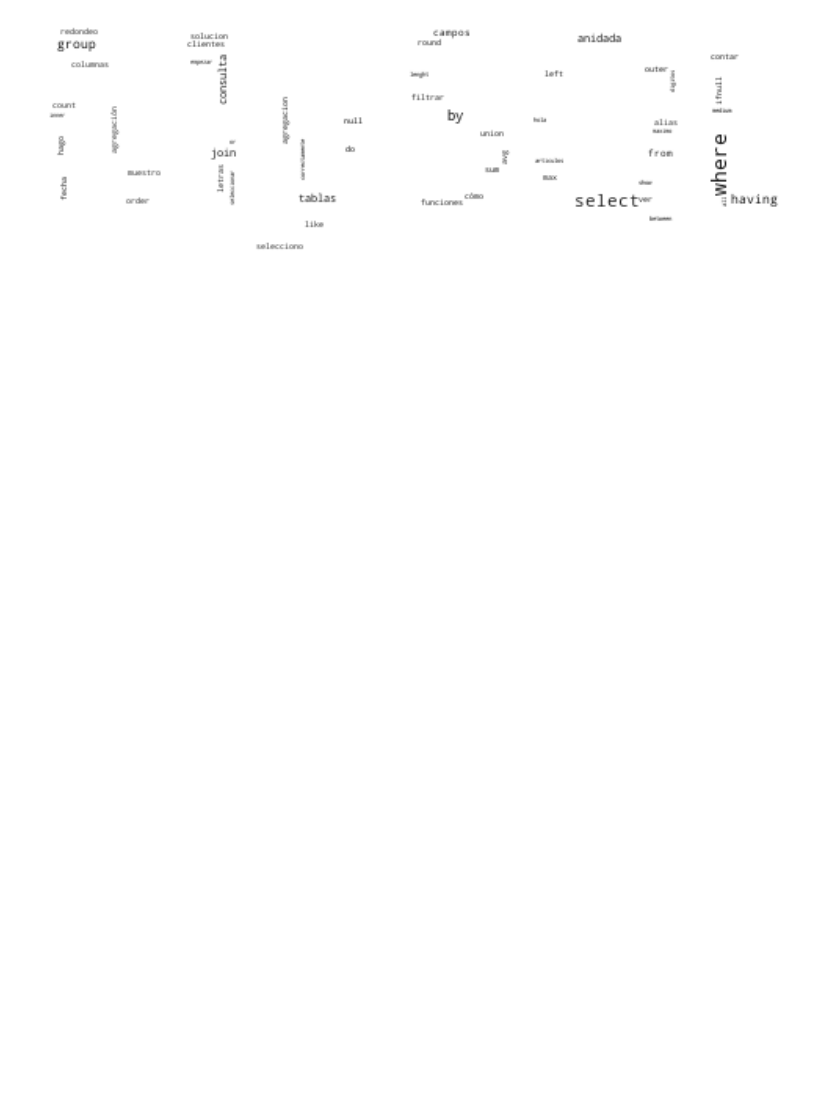

In [9]:
#Let's do a frikada!!

from PIL import Image

_mask = np.array(Image.open("mysql-logo-bn2.png"))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", mask=_mask, colormap=cmap)
wc.generate_from_frequencies(dictionary)
plt.figure(figsize=(22,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")